In [116]:
import os
os.chdir("/Users/nickl/Documents/College/DATA 481 - Gene Data")

In [117]:
import pandas as pd
mdf = pd.read_csv("normalized_expression.csv") #loading dataset
mapdf = pd.read_csv("gene_mappings.csv") #loading mappings dataset
metadf = pd.read_csv("metadata.csv") #loading metadata dataset

In [118]:
#merging mapping df with gene expression df
mdf.rename(columns={'Unnamed: 0': 'ENSEMBLID'}, inplace=True)
mdf = pd.merge(mdf, mapdf, on =  "ENSEMBLID", how='left')
mdf.set_index("ENSEMBLID", inplace=True)
mdf.head()


,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
ENSEMBLID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,11.643945,12.660240,12.011286,10.902371,9.778870,11.086341,13.304347,11.204773,12.835616,12.470305,...,12.294185,12.843887,12.083013,13.196523,13.764084,11.588476,12.021739,12.586284,TSPAN6,protein_coding
ENSG00000000005,3.527251,1.141077,0.000000,2.923184,3.371978,5.487672,3.474578,2.517265,7.229333,0.000000,...,3.783844,5.468667,3.113357,3.538314,3.256006,2.887933,2.922775,3.424977,TNMD,protein_coding
ENSG00000000419,11.004391,10.379188,10.492609,10.625022,12.325179,11.250164,10.834781,11.193174,12.695187,11.631386,...,10.692166,11.044221,10.430246,11.321920,10.528515,10.027390,10.016298,10.270992,DPM1,protein_coding
ENSG00000000457,10.216685,10.975065,10.788455,11.340000,10.827489,10.294248,10.472310,11.166237,10.304750,9.737110,...,8.542477,9.221241,8.977203,10.255138,8.946696,8.857296,9.003882,9.138294,SCYL3,protein_coding
ENSG00000000460,9.076165,9.584343,9.316149,8.781399,9.825582,8.366424,8.994853,10.627795,9.219602,10.100473,...,8.379882,8.966339,8.967783,10.208429,7.872731,7.985417,7.840538,8.497433,C1orf112,protein_coding


In [119]:
print(mdf.shape)

(60616, 785)


In [120]:
#filtering for only protein coding genes
fmdf = mdf.loc[mdf["GENETYPE"] == "protein_coding", :]
print(fmdf.shape)

(19944, 785)


In [121]:
tdf = fmdf.T
print(tdf.shape)

(785, 19944)


In [122]:
#Removing all genes with over 50% zeroes
zero_proportion = (tdf == 0).sum() / (len(tdf) - 2) #subtracted 2 because of the added 2 columns for gene mapping

no0df = tdf.loc[:, zero_proportion < 0.5]



In [123]:
#Removing all genes with means less than 10
genemaprows = no0df.loc[["GENETYPE","GENESYMBOL"]]
fno0df = no0df.drop(["GENETYPE", "GENESYMBOL"])
colmeans = fno0df.mean(axis = 0)
filtereddf = fno0df.loc[:,colmeans > 10]
print(filtereddf.shape)


(783, 8094)


In [124]:
#taking top 2000 columns with highest variances
import numpy as np
variances = np.var(filtereddf, axis=0)
filtereddf.loc['variances'] = variances
filtereddf = filtereddf.sort_values(by='variances', axis=1, ascending=False)
finaldf = filtereddf.iloc[:, 0:2000]
print(finaldf.shape)


C:\Users\nickl\AppData\Local\Temp\ipykernel_5548\2023050465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddf.loc['variances'] = variances


(784, 2000)


In [125]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Explained variance ratio by each component:
[0.17179518 0.1159121 ]


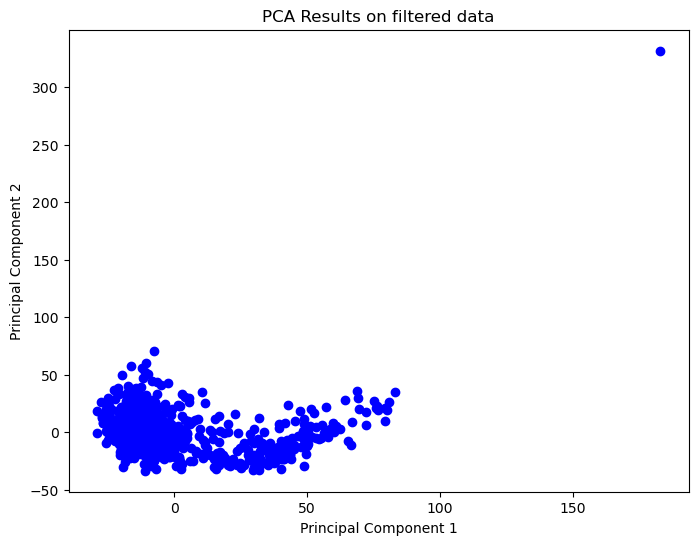

Principal Components:
[[-0.11449423 -0.1353784  -0.1179364  ... -0.00849561 -0.00949255
  -0.01040643]
 [ 0.01214526  0.05550294  0.04106033 ... -0.00262083 -0.00426727
  -0.0041529 ]]


In [126]:

pca = PCA(n_components=2)  # You can choose the number of components you want to retain
pca_result = pca.fit_transform(finaldf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.title("PCA Results on filtered data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Principal Components:")
print(pca.components_)

Explained variance ratio by each component:
[0.10889832 0.07004751]


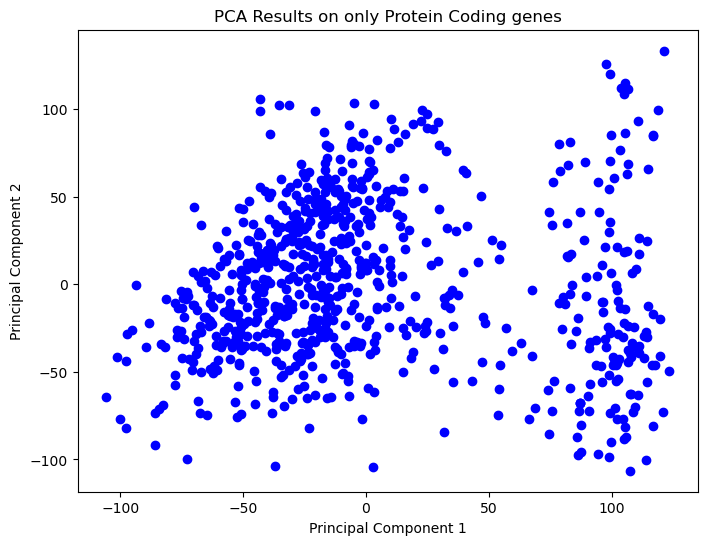

Principal Components:
[[ 0.00625032  0.00259489  0.00163717 ...  0.          0.00053835
   0.0033419 ]
 [ 0.00292305  0.0274753  -0.00660505 ...  0.          0.00388417
  -0.00137311]]


In [127]:
pca = PCA(n_components=2)  # You can choose the number of components you want to retain
pca_result = pca.fit_transform(tdf.drop(["GENETYPE", "GENESYMBOL"]))

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.title("PCA Results on only Protein Coding genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Principal Components:")
print(pca.components_)

Explained variance ratio by each component:
[0.0997269  0.08081518]


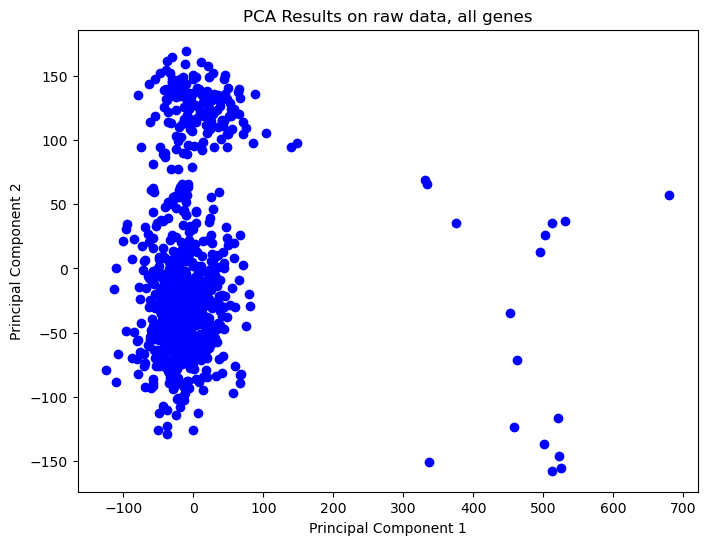

Principal Components:
[[ 0.00075862  0.00822293 -0.00214422 ... -0.          0.00266531
  -0.00143063]
 [ 0.00459812 -0.00027544  0.00190765 ...  0.         -0.00020668
   0.003128  ]]


In [128]:
pca = PCA(n_components=2)  # You can choose the number of components you want to retain
pca_result = pca.fit_transform(mdf.T.drop(["GENETYPE", "GENESYMBOL"]))

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.title("PCA Results on raw data, all genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Principal Components:")
print(pca.components_)